In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

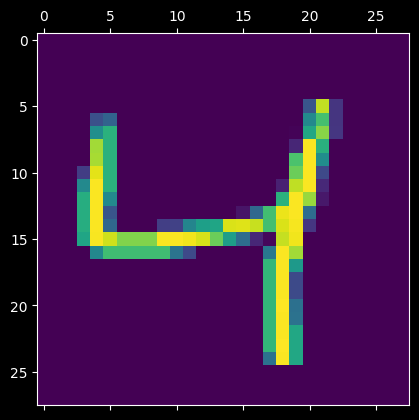

In [7]:
plt.matshow(X_train[2])

In [8]:
## Scaling the data
X_train = X_train/255
X_test = X_test/255

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))  # 10 neurons in the output layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4693 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9139
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9259


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.9266


[0.26463961601257324, 0.9265999794006348]

In [12]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[3.6429089e-02, 2.8579649e-07, 4.7699992e-02, ..., 9.9985063e-01,
        9.8577894e-02, 6.6177362e-01],
       [4.9063647e-01, 4.1454756e-03, 9.9956816e-01, ..., 1.1332539e-12,
        1.2371936e-01, 2.1349293e-09],
       [3.1131966e-04, 9.9342257e-01, 6.6895050e-01, ..., 1.1350446e-01,
        3.3765993e-01, 4.1402571e-02],
       ...,
       [3.3394783e-06, 2.8890788e-06, 9.8109525e-04, ..., 2.4451262e-01,
        4.0705255e-01, 7.1423280e-01],
       [1.1465217e-04, 1.0247775e-04, 1.7800496e-04, ..., 3.2682190e-05,
        6.2724859e-01, 7.7748969e-05],
       [8.3897468e-03, 1.2968669e-10, 1.4022240e-01, ..., 1.7571175e-08,
        1.4460871e-04, 6.5442350e-07]], dtype=float32)

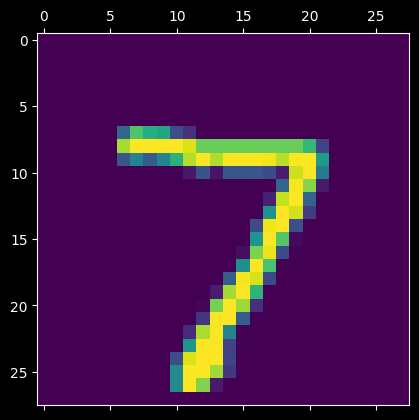

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.6429089e-02, 2.8579649e-07, 4.7699992e-02, 9.5632148e-01,
       2.0223178e-03, 1.1489947e-01, 1.8010370e-06, 9.9985063e-01,
       9.8577894e-02, 6.6177362e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

## Confusion Matrix

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    7,  928,   13,    9,    4,   13,   12,   35,    3],
       [   4,    0,   21,  922,    0,   23,    3,   12,   18,    7],
       [   1,    1,    2,    2,  915,    0,   13,    5,   10,   33],
       [  11,    3,    2,   32,   10,  772,   19,    8,   29,    6],
       [  14,    3,    6,    1,    7,    9,  915,    2,    1,    0],
       [   2,    5,   21,    6,    4,    1,    0,  966,    2,   21],
       [   7,    9,    7,   26,    9,   22,   10,   13,  865,    6],
       [  11,    7,    1,   10,   25,    7,    0,   35,    6,  907]])>

Text(58.222222222222214, 0.5, 'Truth')

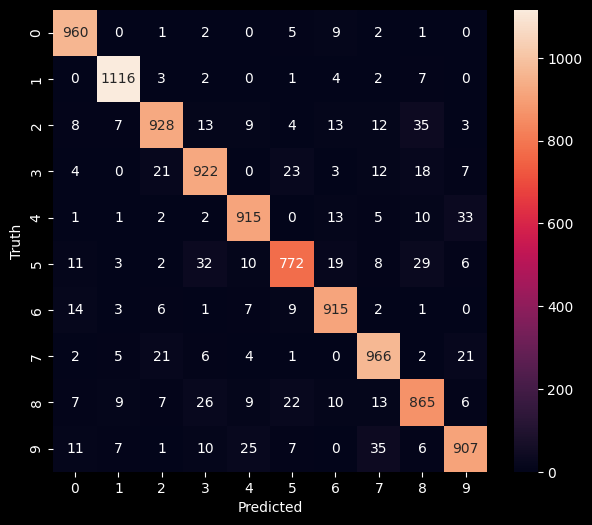

In [18]:
import seaborn as sn
plt.figure(figsize = (7,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding hidden layer

In [19]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(100, activation='relu'))  # 100 neurons in the hidden layer
model1.add(Dense(10, activation='sigmoid'))  # 10 neurons in the output layer
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2774 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0853 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0627 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9846


In [21]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9769


[0.07462327927350998, 0.9768999814987183]

In [22]:
y_new_predicted = model1.predict(X_test)
y_new_predicted_labels = [np.argmax(i) for i in y_new_predicted]
new_cm = tf.math.confusion_matrix(labels=y_test, predictions=y_new_predicted_labels)

313/313 [==============================] - 1s 2ms/step


Text(58.222222222222214, 0.5, 'Truth')

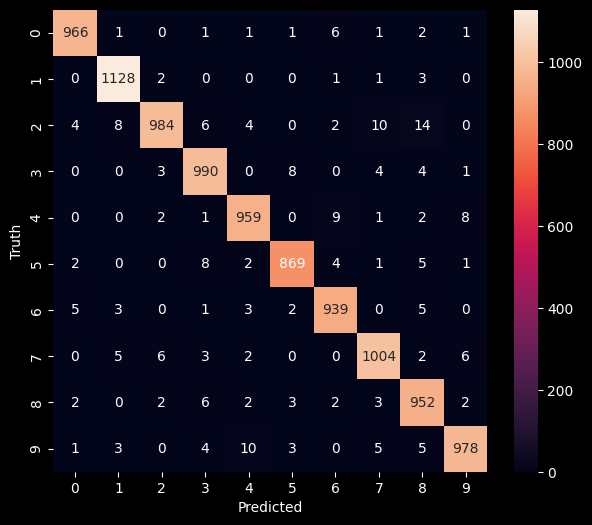

In [23]:
import seaborn as sn
plt.figure(figsize = (7,6))
sn.heatmap(new_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')